In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

train_x, train_y = train_x[0:6000], train_y[0:6000]
test_x, test_y = test_x[0:6000], test_y[0:6000]

n_train = train_x.shape[0]
n_test = test_x.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_x.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_x.shape))

11501568/11490434 [==============================] - 0s 0us/step
The number of training images : 6000, shape : (6000, 28, 28, 1)
The number of testing images : 6000, shape : (6000, 28, 28, 1)


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                          kernel_size = (3, 3),
                          activation = 'relu',
                          padding = 'SAME',
                          input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters = 64,
                          kernel_size = (3, 3),
                          activation = 'relu',
                          padding = 'SAME',
                          input_shape = (14, 14, 32)),
    
    tf.keras.layers.GlobalAveragePooling2D(),
    
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 19,466
Trainable params: 19,466
Non-traina

In [4]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = 'accuracy')

In [5]:
history = model.fit(train_x, train_y, batch_size = 128, epochs = 20)


Epoch 1/20
47/47 [==============================] - 13s 8ms/step - loss: 2.2894 - accuracy: 0.1245
Epoch 2/20
47/47 [==============================] - 0s 5ms/step - loss: 2.2201 - accuracy: 0.2050
Epoch 3/20
47/47 [==============================] - 0s 5ms/step - loss: 2.0053 - accuracy: 0.3285
Epoch 4/20
47/47 [==============================] - 0s 5ms/step - loss: 1.7728 - accuracy: 0.3737
Epoch 5/20
47/47 [==============================] - 0s 5ms/step - loss: 1.6568 - accuracy: 0.4145
Epoch 6/20
47/47 [==============================] - 0s 5ms/step - loss: 1.5854 - accuracy: 0.4563
Epoch 7/20
47/47 [==============================] - 0s 5ms/step - loss: 1.5357 - accuracy: 0.4693
Epoch 8/20
47/47 [==============================] - 0s 5ms/step - loss: 1.4959 - accuracy: 0.4975
Epoch 9/20
47/47 [==============================] - 0s 5ms/step - loss: 1.4464 - accuracy: 0.5325
Epoch 10/20
47/47 [==============================] - 0s 5ms/step - loss: 1.4096 - accuracy: 0.5373
Epoch 11/20
47/47 

[2.289368152618408, 2.220066785812378, 2.0053329467773438, 1.7728102207183838, 1.6567747592926025, 1.585356593132019, 1.5357201099395752, 1.4959245920181274, 1.4464153051376343, 1.4095966815948486, 1.36101233959198, 1.3149322271347046, 1.2685346603393555, 1.2200525999069214, 1.1720582246780396, 1.1279395818710327, 1.0819581747055054, 1.0392409563064575, 1.001774549484253, 0.9678012132644653]


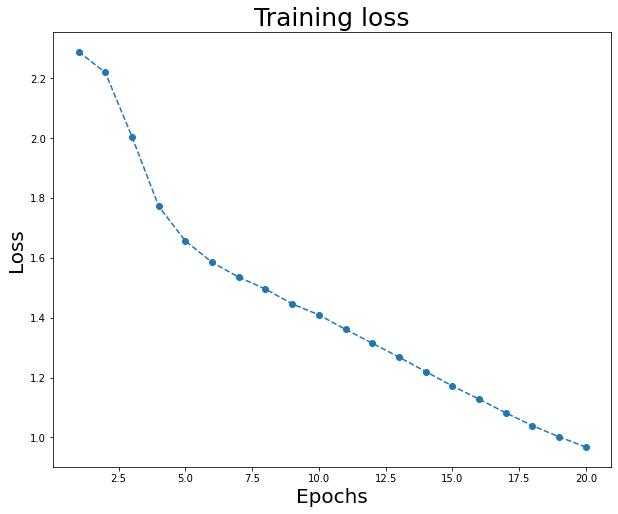

In [6]:
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.figure(figsize = (10,8))
plt.plot(epochs, loss, "o--", label="Training loss")
plt.title("Training loss", fontsize = 25)
plt.xlabel("Epochs", fontsize = 20)
plt.ylabel("Loss", fontsize = 20)
plt.savefig('Training loss.tiff')
print(loss)
plt.show()

[0.12449999898672104, 0.20499999821186066, 0.32850000262260437, 0.3736666738986969, 0.41449999809265137, 0.45633333921432495, 0.46933332085609436, 0.4975000023841858, 0.5325000286102295, 0.5373333096504211, 0.5724999904632568, 0.5931666493415833, 0.6175000071525574, 0.6370000243186951, 0.6606666445732117, 0.6663333177566528, 0.6915000081062317, 0.7074999809265137, 0.7096666693687439, 0.7239999771118164]


<Figure size 432x288 with 0 Axes>

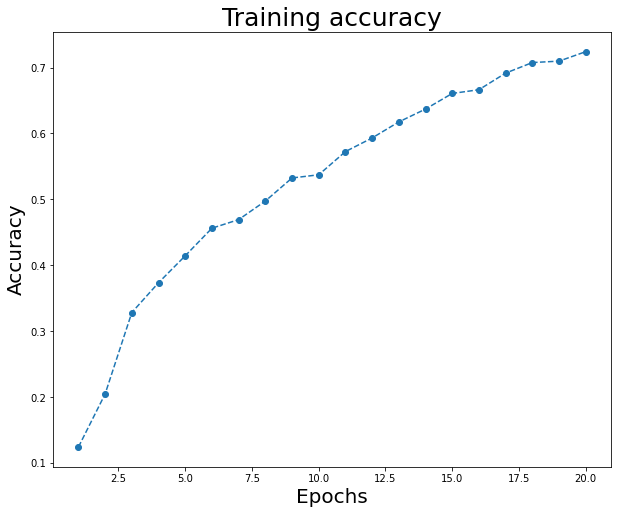

In [7]:
plt.clf()
plt.figure(figsize = (10,8))
acc = history.history["accuracy"]
plt.plot(epochs, acc, "o--", label="Training accuracy")
plt.title("Training accuracy", fontsize = 25)
plt.xlabel("Epochs", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.savefig('Accuracy.tiff')
print(acc)
plt.show()

In [8]:
# accuracy test
test_loss, test_acc = model.evaluate(test_x, test_y)

188/188 [==============================] - 1s 3ms/step - loss: 0.9932 - accuracy: 0.7107


In [9]:
## Define the CAM
# get max pooling layer and fully connected layer 
conv_layer = model.get_layer(index = 2)
fc_layer = model.layers[4].get_weights()[0]

# Class activation map 
my_map = tf.matmul(conv_layer.output, fc_layer)
CAM = tf.keras.Model(inputs = model.inputs, outputs = my_map)

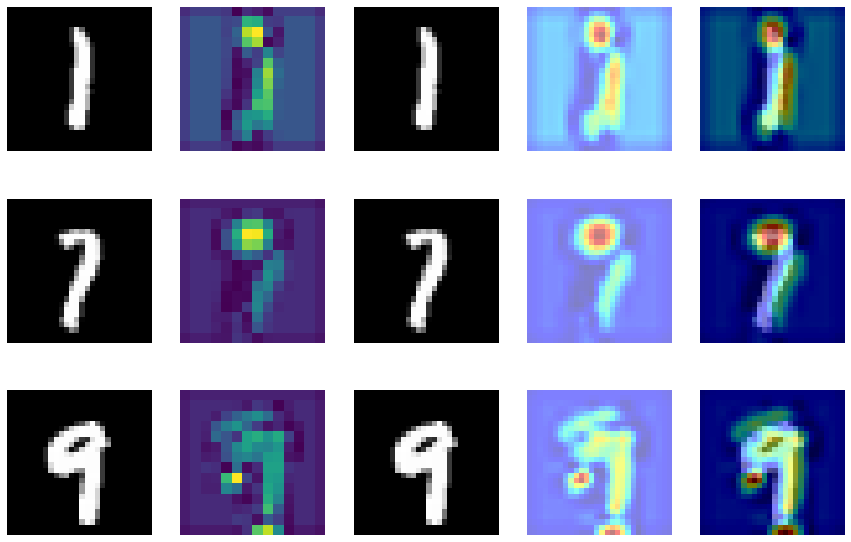

In [10]:
## Compare the CAM data from input of 1, 7 and 9
# Select indices of test data of 1, 7 and 9
list_1 = []
list_7 = []
list_9 = []
for i in range(1000):
    if test_y[i] == 1:
        list_1.append(i)
    if test_y[i] == 7:
        list_7.append(i)
    if test_y[i] == 9:
        list_9.append(i)

## Create CAM data for "1"
test_idx_1 = [list_1[np.random.randint(0, 90)]]
test_image_1 = test_x[test_idx_1]
pred_1 = np.argmax(model.predict(test_image_1), axis = 1)
predCAM_1 = CAM.predict(test_image_1)

attention_1 = predCAM_1[:,:,:,pred_1]
attention_1 = np.abs(np.reshape(attention_1,(14,14)))

resized_attention_1 = cv2.resize(attention_1,
                                 (28, 28), 
                                 interpolation = cv2.INTER_CUBIC)

resized_test_x_1 = cv2.resize(test_image_1.reshape(28,28), 
                              (28, 28),
                              interpolation = cv2.INTER_CUBIC)

## Create CAM data for "7"
test_idx_2 = [list_7[np.random.randint(0, 90)]]
test_image_2 = test_x[test_idx_2]

pred_2 = np.argmax(model.predict(test_image_2), axis = 1)
predCAM_2 = CAM.predict(test_image_2)

attention_2 = predCAM_2[:,:,:,pred_2]
attention_2 = np.abs(np.reshape(attention_2,(14,14)))

resized_attention_2 = cv2.resize(attention_2,
                                 (28, 28), 
                                 interpolation = cv2.INTER_CUBIC)

resized_test_x_2 = cv2.resize(test_image_2.reshape(28,28), 
                              (28, 28),
                              interpolation = cv2.INTER_CUBIC)

## Create CAM data for "9"
test_idx_3 = [list_9[np.random.randint(0, 90)]]
test_image_3 = test_x[test_idx_3]

pred_3 = np.argmax(model.predict(test_image_3), axis = 1)
predCAM_3 = CAM.predict(test_image_3)

attention_3 = predCAM_3[:,:,:,pred_3]
attention_3 = np.abs(np.reshape(attention_3,(14,14)))

resized_attention_3 = cv2.resize(attention_3,
                                 (28, 28), 
                                 interpolation = cv2.INTER_CUBIC)

resized_test_x_3 = cv2.resize(test_image_3.reshape(28,28), 
                              (28, 28),
                              interpolation = cv2.INTER_CUBIC)
# Plot
plt.figure(figsize = (15,10))
plt.subplot(3,5,1)
plt.imshow(test_x[test_idx_1].reshape(28,28), 'gray')
plt.axis('off')
plt.subplot(3,5,2)
plt.imshow(attention_1)
plt.axis('off')
plt.subplot(3,5,3)
plt.imshow(resized_test_x_1, 'gray')
plt.axis('off')
plt.subplot(3,5,4)
plt.imshow(resized_attention_1, 'jet', alpha = 0.5)
plt.axis('off')
plt.subplot(3,5,5)
plt.imshow(resized_test_x_1, 'gray')
plt.imshow(resized_attention_1, 'jet', alpha = 0.5)
plt.axis('off')

plt.subplot(3,5,6)
plt.imshow(test_x[test_idx_2].reshape(28,28), 'gray')
plt.axis('off')
plt.subplot(3,5,7)
plt.imshow(attention_2)
plt.axis('off')
plt.subplot(3,5,8)
plt.imshow(resized_test_x_2, 'gray')
plt.axis('off')
plt.subplot(3,5,9)
plt.imshow(resized_attention_2, 'jet', alpha = 0.5)
plt.axis('off')
plt.subplot(3,5,10)
plt.imshow(resized_test_x_2, 'gray')
plt.imshow(resized_attention_2, 'jet', alpha = 0.5)
plt.axis('off')

plt.subplot(3,5,11)
plt.imshow(test_x[test_idx_3].reshape(28,28), 'gray')
plt.axis('off')
plt.subplot(3,5,12)
plt.imshow(attention_3)
plt.axis('off')
plt.subplot(3,5,13)
plt.imshow(resized_test_x_3, 'gray')
plt.axis('off')
plt.subplot(3,5,14)
plt.imshow(resized_attention_3, 'jet', alpha = 0.5)
plt.axis('off')
plt.subplot(3,5,15)
plt.imshow(resized_test_x_3, 'gray')
plt.imshow(resized_attention_3, 'jet', alpha = 0.5)
plt.axis('off')
plt.show()

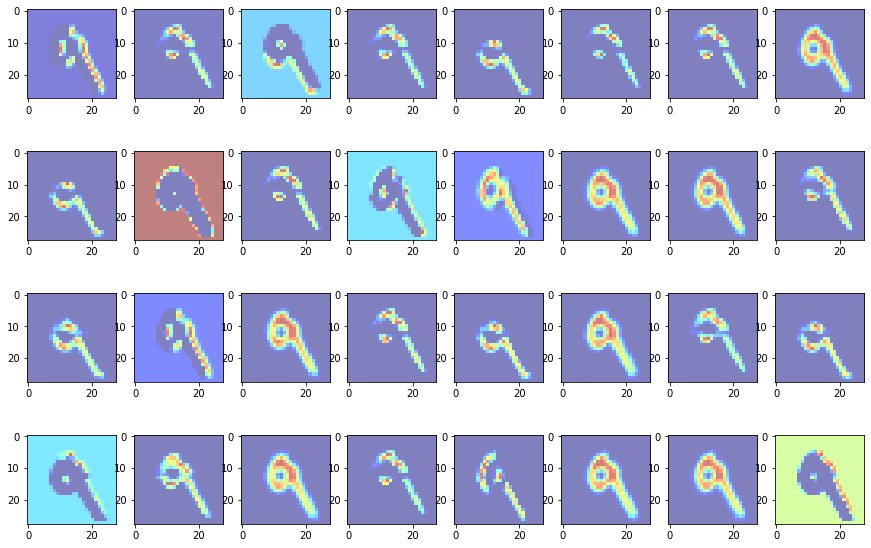

In [11]:
conv_layer = model.get_layer(index = 0)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)

plt.figure(figsize = (15, 10))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(predy[0, :, :, i], 'jet', alpha = 0.5)

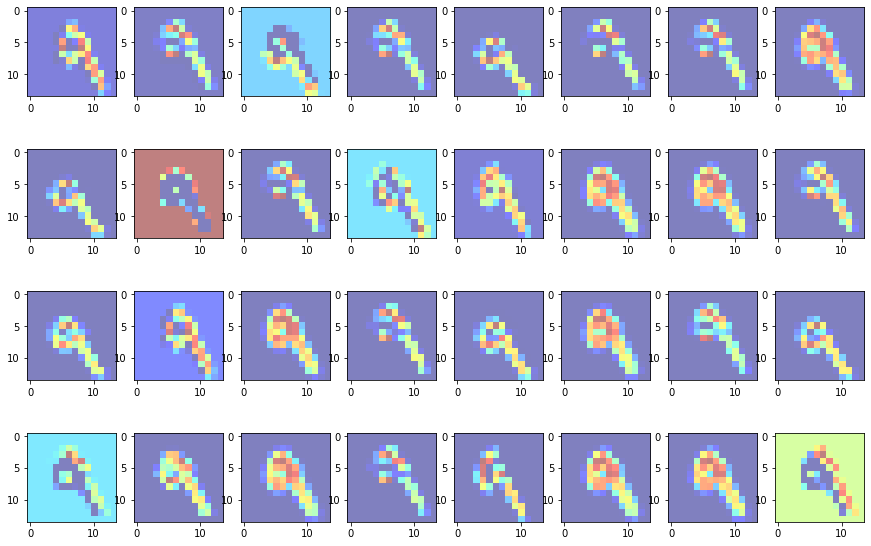

In [12]:
conv_layer = model.get_layer(index = 1)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)

plt.figure(figsize = (15, 10))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(predy[0, :, :, i], 'jet', alpha = 0.5)

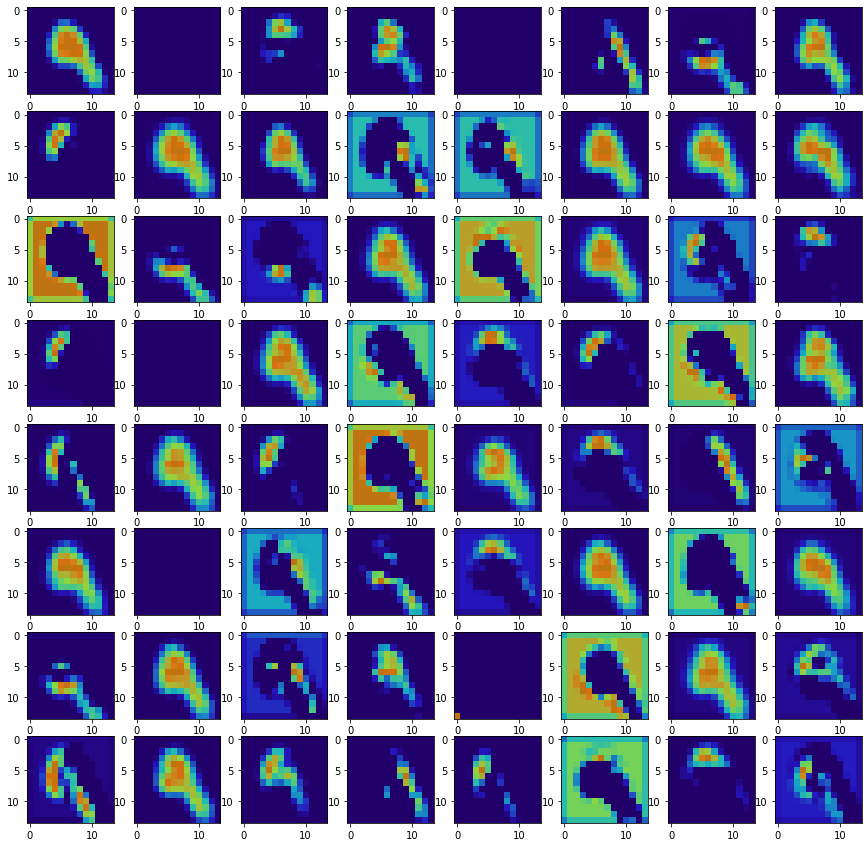

In [13]:
conv_layer = model.get_layer(index = 2)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)

plt.figure(figsize = (15, 15))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(predy[0, :, :, i])
    plt.imshow(predy[0, :, :, i], 'jet', alpha = 0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


[[1.87110913e+00 0.00000000e+00 1.13716535e-01 6.67860210e-01
  0.00000000e+00 9.50674415e-01 1.20940137e+00 1.51236928e+00
  6.24302328e-01 2.71367359e+00 1.36756551e+00 1.23932970e+00
  6.48653150e-01 4.25214291e+00 3.49799228e+00 8.42236817e-01
  1.59176195e+00 1.65285575e+00 1.82584238e+00 2.64989543e+00
  1.41649616e+00 4.76489735e+00 1.14702702e+00 2.15966240e-01
  3.46786588e-01 0.00000000e+00 1.78762567e+00 1.78794301e+00
  1.44140530e+00 2.68185705e-01 1.72225642e+00 1.51486599e+00
  8.20753157e-01 2.65849471e+00 2.68997222e-01 1.45652676e+00
  1.48107409e+00 1.60382020e+00 1.87377286e+00 4.50210541e-01
  1.77063668e+00 0.00000000e+00 9.94663298e-01 2.15531528e-01
  1.35559380e+00 2.07955623e+00 1.76480258e+00 2.73003578e+00
  8.89073610e-01 2.17738366e+00 2.77096897e-01 8.62638295e-01
  3.05855821e-04 1.79285586e+00 3.25050426e+00 3.91906857e-01
  1.53236508e+00 2.31622124e+00 6.04849041e-01 6.82700276e-01
  1.90335408e-01 1.23827684e+00 6.26084328e-01 7.06938863e-01]]


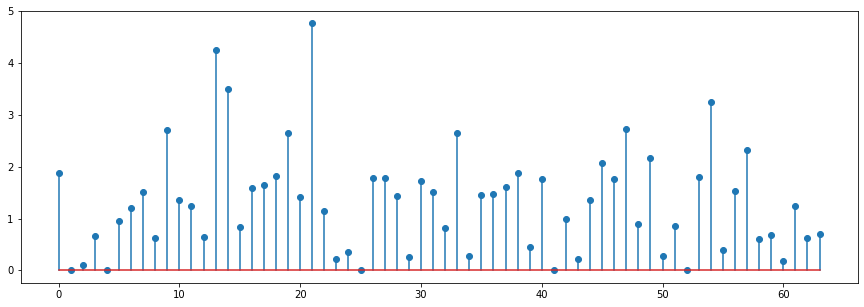

In [14]:
conv_layer = model.get_layer(index = 3)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)
plt.figure(figsize = (15, 5))
plt.stem(predy[0, :])
print(predy)

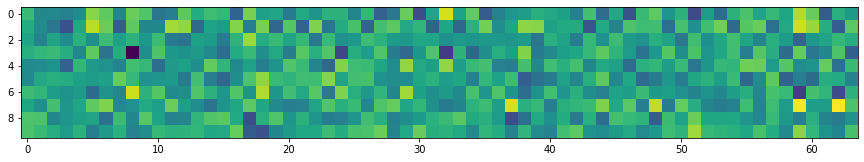

In [15]:
w = model.get_weights()
plt.figure(figsize = (15, 5))
plt.imshow(w[4].T)

<class 'keras.engine.functional.Functional'>
[[0.00174106 0.00033856 0.08583363 0.04365994 0.13373342 0.01834862
  0.18459807 0.01173627 0.20892663 0.31108382]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


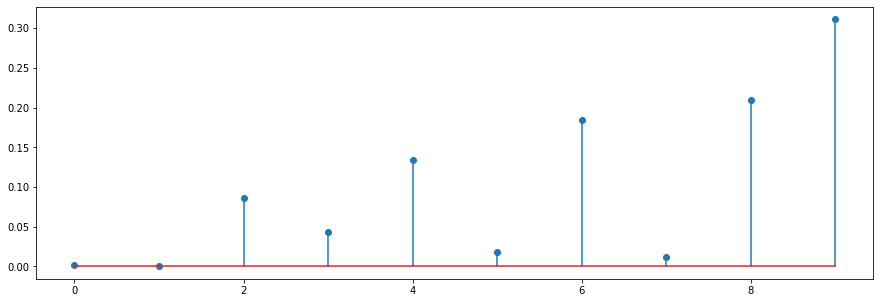

In [16]:
conv_layer = model.get_layer(index = 4)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)
print(type(my_output))
plt.figure(figsize = (15, 5))
plt.stem(predy[0, :])
print(predy)